# **Introduction To Semantic Link in Fabric**

### Sandeep Pawar  |   fabric.guru

#### **Agenda & Topics**

#### - Semantic Relationships
#### - Semantic Propagation
#### - Data Science
#### - Power BI Automation
#### - Utilities
#### 

In [1]:
%pip install semantic-link --q


StatementMeta(, , -1, Finished, Available)


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import sempy.fabric as fabric
from sempy.fabric import FabricDataFrame
from sempy.dependencies import plot_dependency_metadata

url = "https://raw.githubusercontent.com/HariVM/Analytics/master/1000%20Sales%20Records.csv"


df = pd.read_csv(url)
df.head()

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 10, Finished, Available)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [7]:
fdf = FabricDataFrame(df)
fdf.head()


StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 15, Finished, Available)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


### **Semantic Relationships**

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 31, Finished, Available)

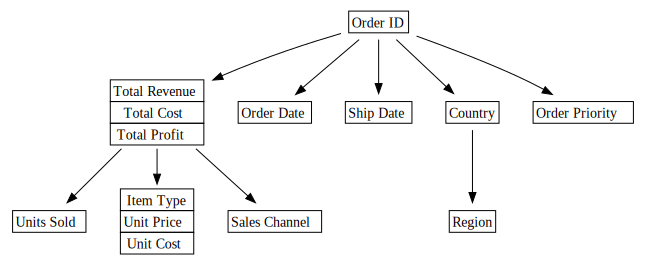

In [14]:
deps = fdf.find_dependencies(threshold=0)
# deps
plot_dependency_metadata(deps)

In [13]:
fdf[["Total Revenue", "Total Cost", "Total Profit", "Sales Channel"]].drop_duplicates()

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 30, Finished, Available)

,Total Revenue,Total Cost,Total Profit,Sales Channel
0,3692591.20,2224085.18,1468506.02,Offline
1,464953.08,274426.74,190526.34,Online
2,387259.76,241840.14,145419.62,Offline
3,683335.40,389039.42,294295.98,Offline
4,91853.85,68127.40,23726.45,Offline
...,...,...,...,...
995,995431.92,635698.56,359733.36,Offline
996,73520.64,45912.96,27607.68,Offline
997,1472197.36,868927.08,603270.28,Online
998,6549714.27,4925394.54,1624319.73,Offline


**Relationship Violations**

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 32, Finished, Available)

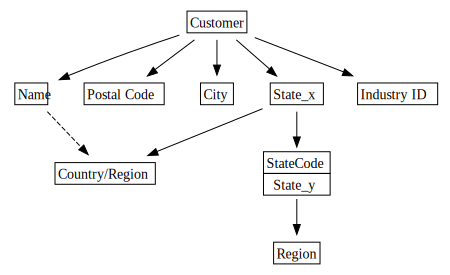

In [15]:
dataset = "Customer Profitability Sample"
customer = fabric.read_table(dataset, "Customer")
state = fabric.read_table(dataset, "State")
customer_state_df = customer.merge(state, left_on="State", right_on="StateCode",  how='left')
dependencies = customer_state_df.find_dependencies()
plot_dependency_metadata(dependencies)

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 33, Finished, Available)

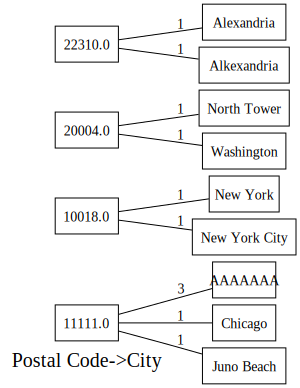

In [16]:
customer_state_df.sort_values("Postal Code").head(100).plot_dependency_violations('Postal Code', 'City')

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 34, Finished, Available)

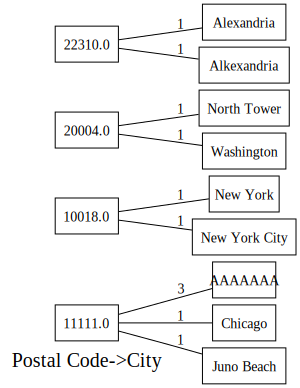

In [17]:
customer_state_df.sort_values("Postal Code").head(100).plot_dependency_violations('Postal Code', 'City')

**Finding Relationships**

In [18]:
tables = [t.name for t in mssparkutils.fs.ls("Files/tables")]
tables


StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 35, Finished, Available)

['BU.parquet',
 'Customer.parquet',
 'Date.parquet',
 'Executive.parquet',
 'Fact.parquet',
 'Industry.parquet',
 'Product.parquet',
 'Scenario.parquet',
 'State.parquet',
 'Table.parquet']

In [19]:
dfs = [pd.read_parquet(f"/lakehouse/default/Files/tables/{t}") for t in tables]
dfs

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 36, Finished, Available)

[     BU Key    BU Division  Executive_id
 0       3.0  HO-0    Minor             1
 1       8.0  LO-0    Minor             1
 2      11.0  SE-0    Minor             1
 3      12.0  SE-0    Minor             1
 4      22.0  HC-0    Minor             1
 ..      ...   ...      ...           ...
 159    63.0  PU-0     Core             3
 160   108.0  CP-0     Core             3
 161    49.0  HO-0   Growth             4
 162     4.0  HO-0     Core             4
 163    10.0  PU-0     Core             5
 
 [164 rows x 4 columns],
      Customer Country/Region                              Name           City  \
 0      1023.0             US                  Spade and Archer         Irving   
 1     10000.0             US                        Globo-Chem        Chicago   
 2     10001.0             US           SNC Directly to America    Westchester   
 3     10002.0             US                               GHG          Plano   
 4     10003.0             US                    ABC Helico

In [20]:
dfs = {t: pd.read_parquet(f"/lakehouse/default/Files/tables/{t}") for t in tables}
dfs

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 37, Finished, Available)

{'BU.parquet':      BU Key    BU Division  Executive_id
 0       3.0  HO-0    Minor             1
 1       8.0  LO-0    Minor             1
 2      11.0  SE-0    Minor             1
 3      12.0  SE-0    Minor             1
 4      22.0  HC-0    Minor             1
 ..      ...   ...      ...           ...
 159    63.0  PU-0     Core             3
 160   108.0  CP-0     Core             3
 161    49.0  HO-0   Growth             4
 162     4.0  HO-0     Core             4
 163    10.0  PU-0     Core             5
 
 [164 rows x 4 columns],
 'Customer.parquet':      Customer Country/Region                              Name           City  \
 0      1023.0             US                  Spade and Archer         Irving   
 1     10000.0             US                        Globo-Chem        Chicago   
 2     10001.0             US           SNC Directly to America    Westchester   
 3     10002.0             US                               GHG          Plano   
 4     10003.0           

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 38, Finished, Available)

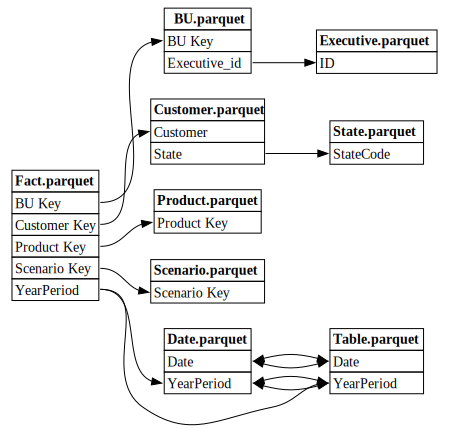

In [21]:
from sempy.relationships import find_relationships, plot_relationship_metadata

possible_relationships = find_relationships(dfs,name_similarity_threshold=0.7,coverage_threshold=0.7,)

plot_relationship_metadata(possible_relationships)

**Power BI Relationships**

In [22]:
pbi_rel = fabric.list_relationships(dataset=dataset)
pbi_rel

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 47, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time
0,m:1,Fact,BU Key,BU,BU Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
1,m:1,Fact,YearPeriod,Date,YearPeriod,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
2,m:1,Fact,Scenario Key,Scenario,Scenario Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
3,m:1,Fact,Product Key,Product,Product Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
4,m:1,Fact,Customer Key,Customer,Customer,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
5,m:1,BU,Executive_id,Executive,ID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
6,m:1,Customer,Industry ID,Industry,ID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52
7,m:1,Customer,State,State,StateCode,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-21 00:17:52


StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 48, Finished, Available)

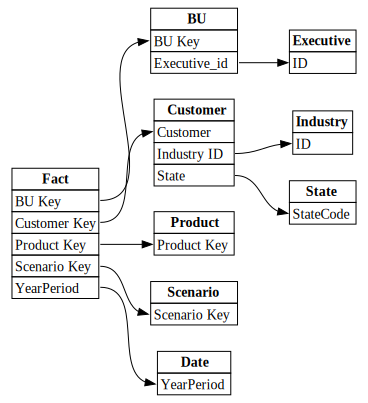

In [23]:
plot_relationship_metadata(pbi_rel)

# **Data Science**

**Before Fabric**

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1696285777236/f5669a56-a556-4dd5-837f-e8f2178f4943.png?auto=compress,format&format=webp)

**After Fabric**

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1696285876540/6a693f8e-fa84-4a0c-a080-9742afab737c.png?auto=compress,format&format=webp)

Limitations

- **KPI/semantic definition mismatch**
- **DAX evolution**
- **Featurization**
- **Advanced data analytics and exploration**

In [24]:
fact = pd.read_parquet("/lakehouse/default/" + "Files/tables/Fact.parquet")
date  = pd.read_parquet("/lakehouse/default/" + "Files/tables/Date.parquet")
revenue = fact.set_index("YearPeriod").join(date.set_index("YearPeriod"))[["Year","Period","Revenue"]].reset_index(drop=True).groupby(["Year","Period"])["Revenue"].sum().reset_index()
revenue['Period']=revenue['Period'].astype('int') 
revenue.head()

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 49, Finished, Available)

,Year,Period,Revenue
0,2013,8,9210648.868
1,2013,9,10739833.52
2,2013,10,12381328.77
3,2013,11,11302569.652
4,2013,12,13486022.58


StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 50, Finished, Available)

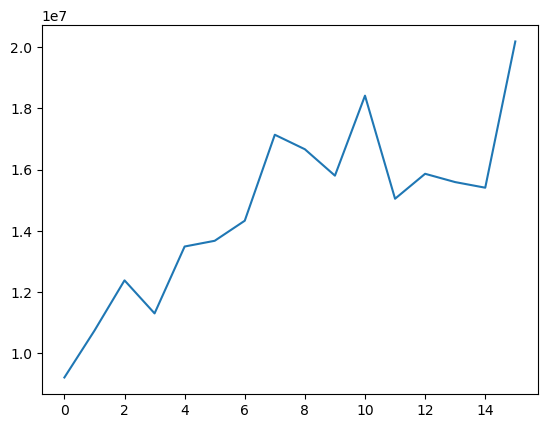

In [25]:
revenue.Revenue.plot();

In [26]:
train = revenue.head(11)
test = revenue.head(5)
from statsmodels.tsa.forecasting.theta import ThetaModel
predictions = ThetaModel(train[["Revenue"]], period=12).fit().forecast(5)

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 51, Finished, Available)

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 52, Finished, Available)

<Axes: >

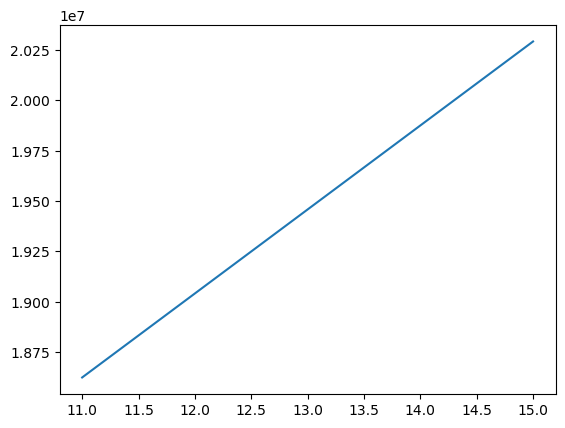

In [27]:
predictions.plot()

In [28]:
fabric.list_measures(dataset= "Customer Profitability Sample").head(3)

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 53, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description
0,Fact,Total Revenue,SUM([Revenue]),Double,False,,
1,Fact,Sum of Material Costs,SUM([Material Costs]),Double,False,,
2,Fact,Sum of Labor Costs Variable,SUM([Labor Costs Variable]),Double,False,,


In [30]:
fabric.list_columns(dataset ="Customer Profitability Sample")

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 55, Finished, Available)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,Key,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Modified Time
0,Fact,Customer Key,,Data,Int64,True,,Customer Key,,,False,False,None,None,True,Default,Ready,,2024-02-02 20:52:40
1,Fact,Product Key,,Data,String,True,,Product Key,,,False,False,None,None,True,Default,Ready,,2024-02-02 20:52:40
2,Fact,BU Key,,Data,Double,True,,BU Key,,,False,False,None,None,True,Default,Ready,,2024-02-02 20:52:40
3,Fact,Scenario Key,,Data,Int64,True,,Scenario Key,,,False,False,None,None,True,Default,Ready,,2024-02-02 20:52:40
4,Fact,Revenue,,Data,Double,True,,Revenue,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40
5,Fact,Material Costs,,Data,Double,True,,Material Costs,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40
6,Fact,Labor Costs Variable,,Data,Double,True,,Labor Costs Variable,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40
7,Fact,Taxes,,Data,Double,True,,Taxes,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40
8,Fact,Rev for Exp Travel,,Data,Double,True,,Rev for Exp Travel,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40
9,Fact,Travel Expenses,,Data,Double,True,,Travel Expenses,,,False,False,None,Sum,True,Default,Ready,,2024-02-02 20:52:40


In [29]:
df_measure = fabric.evaluate_measure(
    "Customer Profitability Sample",
    "Total Revenue",
    ["'Date'[Year]", "Date[Period]"])
df_measure

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 54, Finished, Available)

,Year,Period,Total Revenue
0,2013,08,9210648.868
1,2013,09,10739833.52
2,2013,10,12381328.77
3,2013,11,11302569.652
4,2013,12,13486022.58
5,2014,01,13672969.328
6,2014,02,14328155.488
7,2014,03,17134867.572
8,2014,04,16661321.326
9,2014,05,15799671.386


In [31]:
dax = """ EVALUATE SUMMARIZECOLUMNS('Date'[Year], 'Date'[Period],  "Revenue", 'Fact'[Sum of Revenue])"""
fabric.evaluate_dax(dataset="Customer Profitability Sample", dax_string=dax )

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 56, Finished, Available)

,Date[Year],Date[Period],[Revenue]
0,2014,01,13672969.328
1,2014,02,14328155.488
2,2014,03,17134867.572
3,2014,04,16661321.326
4,2014,05,15799671.386
5,2014,06,18410766.704
6,2014,07,15045658.744
7,2013,08,9210648.868
8,2014,08,15860223.26
9,2013,09,10739833.52


**Data / Definition Drift**

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 57, Finished, Available)

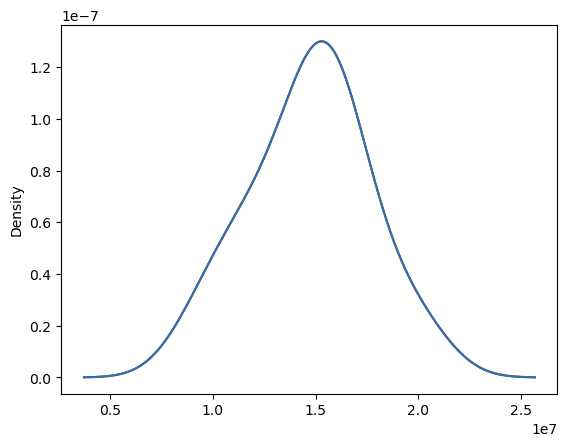

In [32]:
revenue.Revenue.plot(kind="kde", color="red")
df_measure["Total Revenue"].plot(kind="kde");

**Add Measure**

In [33]:
df = FabricDataFrame({
        "Date[Year]": date['Year'].values,
        "Date[Period]": date['Period'].values

    }
)

df


StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 58, Finished, Available)

,Date[Year],Date[Period]
0,2008,01
1,2008,02
2,2008,03
3,2008,04
4,2008,05
...,...,...
79,2014,08
80,2014,09
81,2014,10
82,2014,11


In [34]:

joined_df = df.add_measure(["Sum of Revenue"], dataset="Customer Profitability Sample").dropna()

joined_df

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 59, Finished, Available)

,Date[Year],Date[Period],Sum of Revenue
67,2013,08,9210648.868
68,2013,09,10739833.52
69,2013,10,12381328.77
70,2013,11,11302569.652
71,2013,12,13486022.58
72,2014,01,13672969.328
73,2014,02,14328155.488
74,2014,03,17134867.572
75,2014,04,16661321.326
76,2014,05,15799671.386


## **Power BI** 

- list_*
- create_*
- get_*
- FabricRestClient & PowerBIRestClient

In [39]:
fabric.create

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 64, Finished, Available)

['DataCategory',
 'FabricDataFrame',
 'FabricRestClient',
 'FabricSeries',
 'MetadataKeys',
 'PowerBIRestClient',
 'RefreshExecutionDetails',
 'Trace',
 'TraceConnection',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '_cache',
 '_client',
 '_datacategory',
 '_dataframe',
 '_environment',
 '_flat',
 '_metadatakeys',
 '_token_provider',
 '_trace',
 '_trace_evaluate_dax',
 '_utils',
 'create_lakehouse',
 'create_notebook',
 'create_trace_connection',
 'create_workspace',
 'delete_item',
 'evaluate_dax',
 'evaluate_measure',
 'exceptions',
 'execute_tmsl',
 'execute_xmla',
 'get_artifact_id',
 'get_lakehouse_id',
 'get_notebook_workspace_id',
 'get_refresh_execution_details',
 'get_roles',
 'get_row_level_security_permissions',
 'get_tmsl',
 'get_workspace_id',
 'list_capacities',
 'list_columns',
 'list_datasets',
 'list_expressions',
 'list_hierarchies',
 'list_items',
 'list_measures',
 'li

In [40]:
client = fabric.FabricRestClient()

workspaceId = fabric.get_workspace_id()
response = client.get(f"/v1/workspaces/{workspaceId}/items")
df_items = pd.json_normalize(response.json()['value'])
df_items

StatementMeta(, d85fa7f9-8b4b-4e9e-936e-e6f90c3a4a99, 65, Finished, Available)

,id,type,displayName,description,workspaceId
0,5df00a55-23e8-4ff9-ba44-d23235076ad9,Report,Customer Profitability Sample,,dec97a93-8411-4773-b59d-c8a08930fa13
1,dc906621-52e2-49e4-89a6-37a4948920de,SemanticModel,npug,,dec97a93-8411-4773-b59d-c8a08930fa13
2,356334a6-cc83-4b99-9118-74ef73353239,SemanticModel,Customer Profitability Sample,,dec97a93-8411-4773-b59d-c8a08930fa13
3,c2088aa4-1589-4149-b836-e6b944fc9012,SQLEndpoint,npug,,dec97a93-8411-4773-b59d-c8a08930fa13
4,e7e2f11b-abbd-443d-a1c1-f7240227e3c0,Lakehouse,npug,,dec97a93-8411-4773-b59d-c8a08930fa13
5,9b7f6355-7598-45b1-ad70-eb53a6385dbb,Notebook,Norway FPUG,New notebook,dec97a93-8411-4773-b59d-c8a08930fa13
6,9fdc1bb7-5b99-4d92-89b6-f0e7b4e986a5,MLExperiment,Notebook-1,,dec97a93-8411-4773-b59d-c8a08930fa13
7,f1b9bca3-d407-47e8-8433-9544e4cc3791,MLModel,forecast,,dec97a93-8411-4773-b59d-c8a08930fa13
8,e54a9db3-e102-4d02-8c4e-0e9351699a0e,MLExperiment,Norway-FPUG,,dec97a93-8411-4773-b59d-c8a08930fa13


## **Measure Maze**

In [ ]:
!pip install https://github.com/pawarbi/MeasureMaze/raw/main/measuremaze-0.0.1-py3-none-any.whl --q


In [ ]:
#Import Measure Maze
from measuremaze.map import get_dependencies, PlotDependencies

#Specify Premium workspace and dataset id or name
ws = fabric.get_workspace_id()
ds = "Customer Profitability Sample"

#Returns a FabricDataFrame with dependency mapping for the above dataset
df = get_dependencies(dataset = ds, workspace = ws)
df.head()


In [ ]:
PlotDependencies(df).plot()

In [ ]:
PlotDependencies(df).centrality()